# Day And Night Classifier

Este notebook tem como objetivo desenvolver um modelo de aprendizado de máquina para classificar imagens como "dia" e "noite". 

Para isso, foi utilizado uma parte do dataset AMOS, que contém imagens rotuladas de ambientes fotografados durante o dia e noite. Foram exploradas técnicas de pré-processamento, extração de features e métodos de classificação, a fim de investigar a melhor abordagem para o problema.

Para avaliar a habilidade dos algoritmos de identificação de ambientes de dia e noite, foram utilizadas as métricas Precision, Recall, Accuracy, F1-Score e Matriz de Confusão.

## Setup

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from src.dataset_loader import DatasetLoader
from src.visualization import Visualization
from src.preprocessing import Preprocessing
from src.feature_extraction import FeatureExtraction

In [2]:
datasetLoad = DatasetLoader()
visualization = Visualization()
preprocessing = Preprocessing()
featureExtraction = FeatureExtraction()

## Load the data

Foram utilizadas imagens obtidas a partir do dataset AMOS. 

As imagens foram extraídas a partir de um arquivo zip e armazenadas em uma estrutura de diretórioo que divide os dados de treino e teste. Dentro de cada diretório, temos outros dois nomeados com o rótulo correspondente da imagem (dia e noite), as quais armazenam as imagens correspondentes a cada categoria. 

In [3]:
test_images  = datasetLoad.load_images("data/imagens/test")
train_images = datasetLoad.load_images("data/imagens/training")

Vamos ver algumas imagens do conjunto de dados:

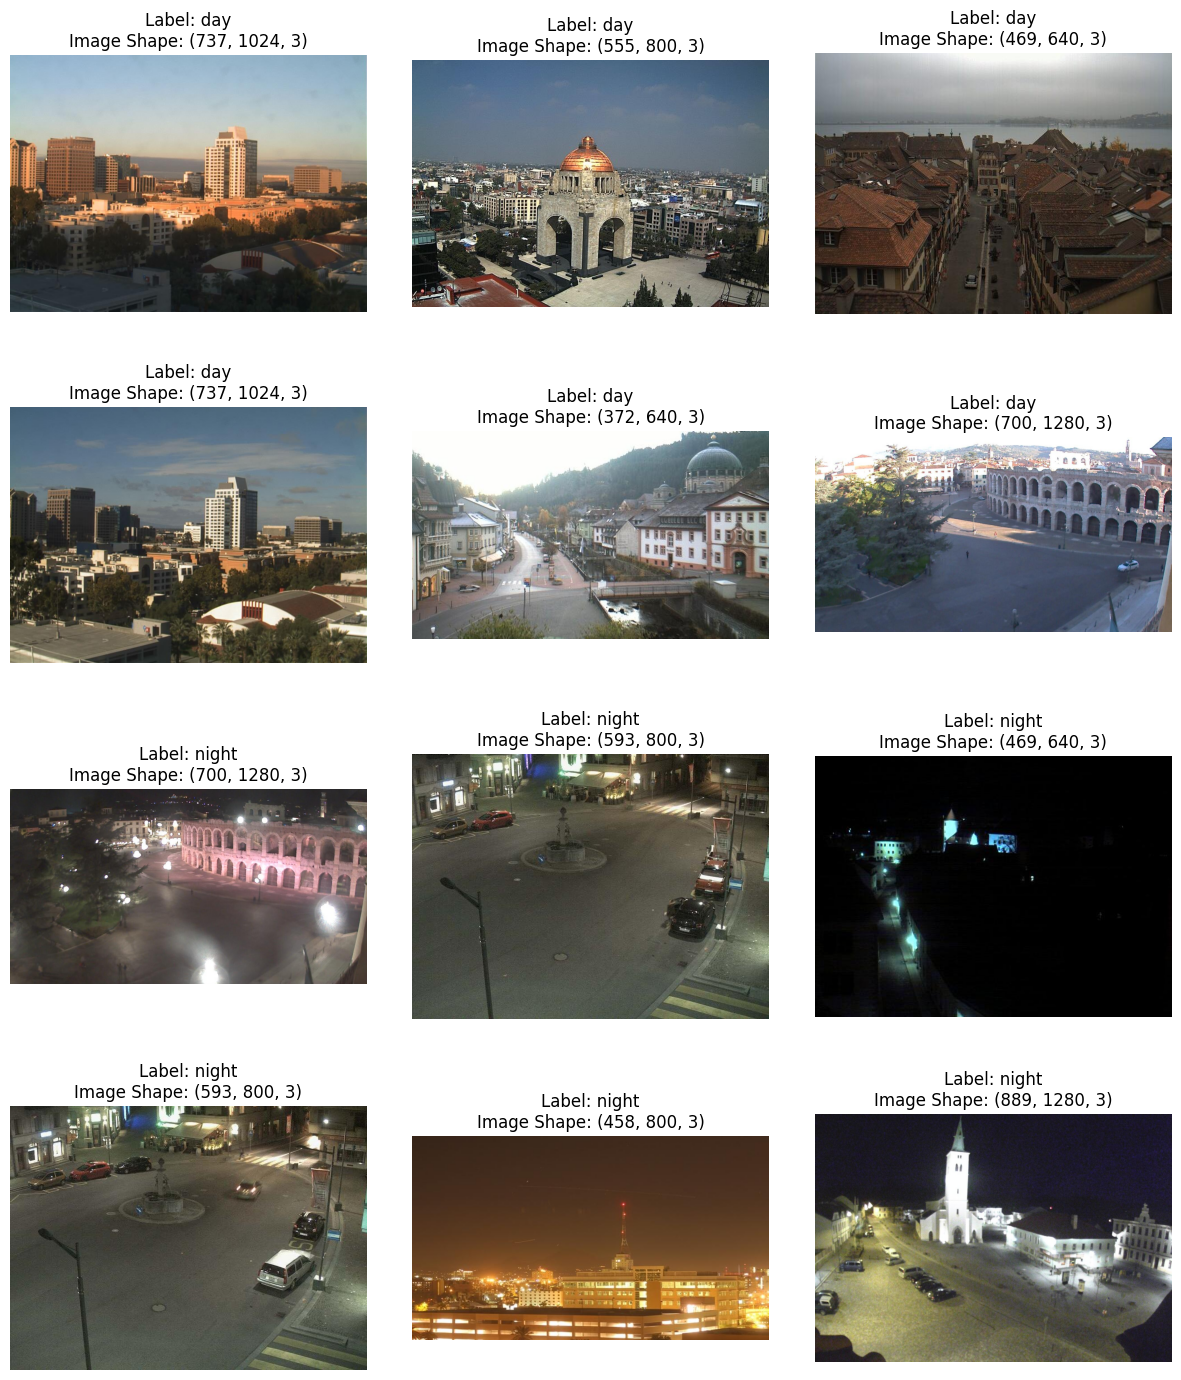

In [4]:
visualization.plot_images(train_images)

Podemos ver que as imagens possuem diferentes tipos de iluminação e tamanhos diferentes. Vamos levar esses pontos em consideração nos próximos passos da análise.

## Preprocessing

A fim de padronizar os dados, vamos redimensionar todas as imagens para um tamanho padrão e aplicar um processamento nos rótulos, convertendo-os para 0 e 1 (dia e noite, respectivamente).

In [5]:
size = (1000, 600)
train_data = preprocessing.standardize_inputs(train_images, size)
test_data = preprocessing.standardize_inputs(test_images, size)

Para facilitar os próximos passos, vamos dividir as labels e imagens em duas listas separadas 

In [6]:
X_train, y_train, X_test, y_test = preprocessing.split_features_labels(train_data, test_data)

A distribuição da quantidade de imagens em cada subconjunto está apresentado no gráfico abaixo. 

Podemos ver que temos um dataset balanceado. 

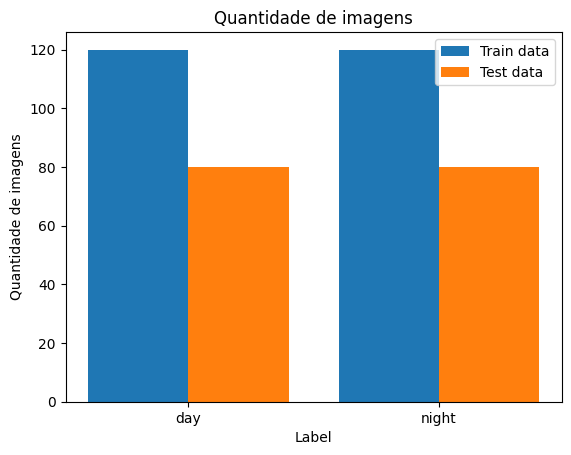

In [7]:
visualization.plot_data_distribution(y_train, y_test)

## Feature Extraction

Agora, iremos extrair features a partir das imagens. O método de extração de features escolhido é de extração do brilho médio de cada imagem. Iremos utilizar essa feature para classificar as imagens nos dois grupos.

In [13]:
X_train_brig = featureExtraction.extract_all_brightness(X_train_preproc)
X_test_brig  = featureExtraction.extract_all_brightness(X_test_preproc)

## Classificação

### Decision Tree

Vamos utilizar a Decision Tree para classificação das features.

O primeiro passo é a preparação das entradas para o algoritmo.

In [14]:
X_train_brig = preprocessing.prepare_input(X_train_brig)
y_train = preprocessing.prepare_input(y_train)

Vamos treinar nosso modelo:

In [15]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(X_train_brig, y_train)

Avaliando o resultado do nosso modelo com o conjunto de teste, temos:

In [12]:
X_test_brig = preprocessing.prepare_input(X_test_brig)

y_pred = clf.predict(X_test_brig)

target_names = ['day', 'night']
print(classification_report(y_test, y_pred, target_names=target_names))

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

         day       0.90      0.93      0.91        80
       night       0.92      0.90      0.91        80

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160

[[74  6]
 [ 8 72]]


## Conclusões

- A aplicação da técnica de extração de features utilizada (brilho médio da imagem) em conjunto com o algoritmo de classificação Decision Tree, apresentou um bom resultado de separação entre os dois grupos de imagens (dia e noite).

## Próximos Passos

- Aplicar técnica de Transfer Learning, a fim de verificar se há melhoria nos resultados
- Explorar outras técnicas de extração de features com algortimos clássicos
- 